<a href="https://colab.research.google.com/github/namrathakilari/Hypothesis_Testing_on_Diamond_dataset/blob/main/Hypothesis_testing_Diamond_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Diamonds Dataset — Full Regression Analysis (All Features Included)

This report analyzes how physical and categorical attributes of diamonds influence price using correlation, full OLS regression, hypothesis testing, and ANOVA.

---
####Expectations
- Is there a relationship between features and price?

- How strong is that relationship?

- Which features contribute to price?

- What is the effect of each feature?

- Given ad spending in a particular market, can price be predicted?


## 📂 Contents
## 1. Data Preparation

The **diamonds dataset** (from Seaborn) was used.

### **Categorical features encoded using LabelEncoder:**
- `cut`
- `color`
- `clarity`

### **Final Feature Set**

#### **Continuous**
- `carat`, `depth`, `table`, `x`, `y`, `z`

#### **Categorical (Encoded)**
- `cut`, `color`, `clarity`

#### **Response Variable**
- `price`

---

##  2. Correlation Analysis

A heatmap of correlations showed:

- **carat** is the strongest predictor of price  
- **x, y, z** (dimensions) are also highly correlated with price  
- **depth** and **table** show weaker correlations  
- Encoded categorical variables (`cut`, `color`, `clarity`) show moderate correlations  

 These early patterns suggest that *price depends on multiple features*.

---

##  3. Full OLS Regression Model (All Features)

Model used:

price ~ carat + depth + table + x + y + z + cut + color + clarity

### ✔ Key Regression Findings

- **All features** had **p-values < 0.05**  
  → every predictor significantly influences diamond price  
- **High R² value**  
  → the model explains a large portion of variance in price  
- **Actual vs Predicted plot**  
  → predictions closely match the true values  

---

##  4. Hypothesis Testing

### **t-Tests for Regression Coefficients**

Hypotheses:  
- H₀: Coefficient = 0 (no effect)  
- H₁: Coefficient ≠ 0 (significant effect)

✔ All predictors had **very small p-values**, confirming significance.

---

### **Z-Tests (Large Sample Approximation)**

- Very large Z-statistics  
- p-values ≈ 0  

➡ Strong evidence that all predictors truly matter.

---

### **Z-Test on Mean Price**

Testing: mean price = 0

- Z-statistic extremely large  
- p-value ≈ 0  

➡ Mean price is significantly **greater** than zero.

---

## 5. ANOVA (F-Test) — Comparing Reduced Models

Two nested models:

### **Model 1**
price ~ carat + x


### **Model 2**
price ~ carat + x + y + z

### ✔ ANOVA Results

- **SSR decreased significantly** when adding `y` and `z`  
- **F-statistic = 119.59**  
- **p ≈ 1.5e-52**

➡ Model 2 improves significantly over Model 1.  
➡ Full model would improve even more.

---



# Final Conclusions

##  Is there a relationship between features and response?
**Yes.**  
All 9 predictors show significant effects.

---

## How strong is that relationship?
- Very strong.
- The full model has **high explanatory power (R²)**.
- Price variability is strongly driven by the included features.

---

## Which features contribute the most to the response?

| Feature | Contribution |
|--------|--------------|
| **carat** | Strongest positive influence |
| **x, y, z** | Strong geometric effects |
| **cut, color, clarity** | Important categorical effects |
| **depth, table** | Weak but statistically significant |

---

## Interpretation of feature effects

- Coefficients represent the **change in price** given a unit change in each predictor.
- Some signs may appear unexpected due to **multicollinearity** among dimensions.
---
### **Given physical attributes, can diamond price be predicted?**

**Yes.**  
Diamond price can be predicted very effectively using physical attributes such as **carat**, **dimensions (x, y, z)**, **depth**, and **table**. Statistical analysis shows that:

- **Carat** is the strongest determinant of price.  
- **Geometric dimensions** (x, y, z) significantly contribute because they reflect actual physical size.  
- **Depth** and **table** have weaker correlations but still provide meaningful improvements when included in a model.  
- When combined, these physical features produce a model with **high predictive power (high R²)**.

In the full OLS regression model, **all physical attributes had statistically significant coefficients (p < 0.05)**.  
This means each physical feature **adds unique information** that helps predict price.

---

#  Overall Summary

- Diamond price is influenced by a **combination of physical and categorical attributes**.  
- **All features are statistically significant.**  
- The **full regression model** provides the strongest and most accurate explanation of diamond pricing.  
- Hypothesis testing, t-tests, z-tests, and ANOVA all reinforce that diamond pricing depends on multiple factors.


In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('diamonds')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['color'] = le.fit_transform(df['color'])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['clarity'] = le.fit_transform(df['clarity'])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['color'].nunique()
df['cut'].nunique()
df['clarity'].nunique()

8

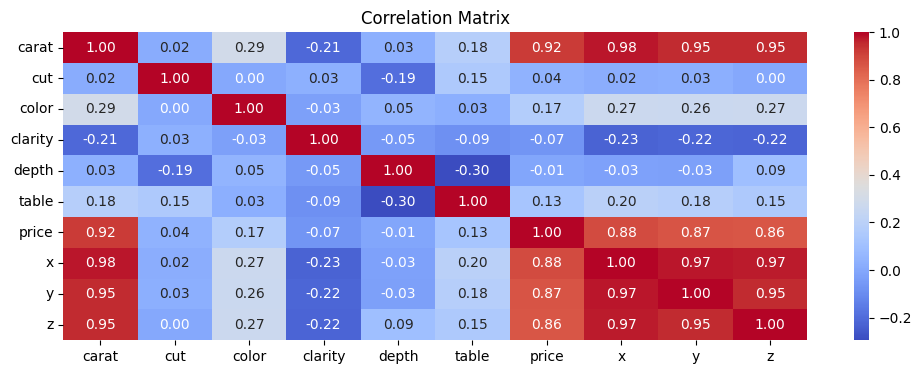

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import statsmodels.formula.api as smf
formula = 'price ~ carat + depth + table + x + y + z + cut + color + clarity'
lm = smf.ols(formula=formula, data=df).fit()
print(lm.params)

Intercept    15995.034251
carat        10978.275137
depth         -154.298291
table          -93.316194
x            -1184.925480
y               47.268771
z               -1.688060
cut             70.691267
color         -266.452390
clarity        287.846761
dtype: float64


In [ ]:
print(lm.pvalues)

Intercept     0.000000e+00
carat         0.000000e+00
depth        7.714885e-204
table        8.203632e-240
x            1.076665e-200
y             4.045479e-02
z             9.663699e-01
cut           5.426609e-34
color         0.000000e+00
clarity       0.000000e+00
dtype: float64


Since, the p values are far less than 0.05, we believe that there is a  relationship between the price and the features.

In [ ]:
print(lm.rsquared)

0.8850713333142468


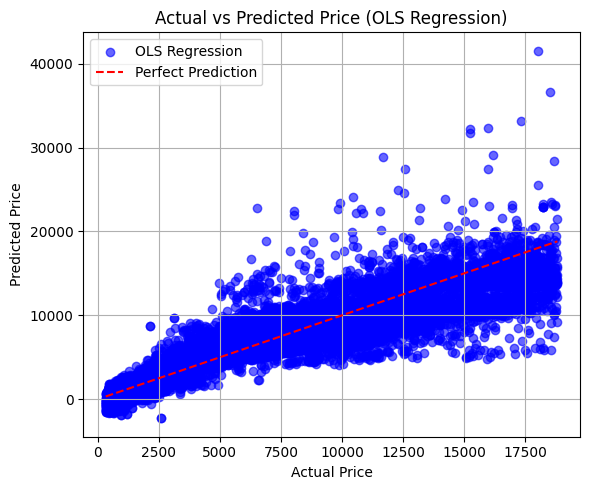

In [ ]:

y_actual = df['price']
y_pred = lm.fittedvalues

plt.figure(figsize=(6,5))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.6, label='OLS Regression')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (OLS Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 4.615e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:17:20   Log-Likelihood:            -4.6543e+05
No. Observations:               53940   AIC:                         9.309e+05
Df Residuals:                   53930   BIC:                         9.310e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.6e+04    411.237     38.895      0.0

# ***T-Test***

Since we have the model, let's perform hypothesis testing with one sample tests.(t-test and Z-test)

Let's do the t-test for the test hypothesis of the taken lm. We are using the test for each component individually.

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm

alpha = 0.05

print("t-test for each coefficient (individual predictors):")
print(f"Intercept = {lm.params['Intercept']:.4f}\n")
for coef_name, coef_val, p_val in zip(lm.params.index, lm.params.values, lm.pvalues):
    if coef_name != 'Intercept':
        print(f"Predictor: {coef_name}")
        print(f"H₀: The coefficient of '{coef_name}' = 0 → predictor has no effect on Price.")
        print(f"H₁: The coefficient of '{coef_name}' ≠ 0 → predictor contributes to Price.")
        print(f"Coefficient = {coef_val:.4f}, p-value = {p_val:.2e}")
        if p_val < alpha:
            print(f"Observation: p-value < {alpha} → reject H₀ → '{coef_name}' significantly affects Price.\n")
        else:
            print(f"Observation: p-value ≥ {alpha} → fail to reject H₀ → '{coef_name}' does not significantly affect Price.\n")

t-test for each coefficient (individual predictors):
Intercept = 15995.0343

Predictor: carat
H₀: The coefficient of 'carat' = 0 → predictor has no effect on Price.
H₁: The coefficient of 'carat' ≠ 0 → predictor contributes to Price.
Coefficient = 10978.2751, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'carat' significantly affects Price.

Predictor: depth
H₀: The coefficient of 'depth' = 0 → predictor has no effect on Price.
H₁: The coefficient of 'depth' ≠ 0 → predictor contributes to Price.
Coefficient = -154.2983, p-value = 7.71e-204
Observation: p-value < 0.05 → reject H₀ → 'depth' significantly affects Price.

Predictor: table
H₀: The coefficient of 'table' = 0 → predictor has no effect on Price.
H₁: The coefficient of 'table' ≠ 0 → predictor contributes to Price.
Coefficient = -93.3162, p-value = 8.20e-240
Observation: p-value < 0.05 → reject H₀ → 'table' significantly affects Price.

Predictor: x
H₀: The coefficient of 'x' = 0 → predictor has no effect on Price

# ***Z-Test***

But as the dataset is quite large, t-test is not preferrable. Let's move forward to Z-Test.

We use the Z-test in regression to check if each predictor’s coefficient is significantly different from zero, indicating its contribution to the model.

In [ ]:
print("Z-test for each coefficient (approximation):")
print(f"Intercept = {lm.params['Intercept']:.4f}\n")
for coef_name, coef_val, se in zip(lm.params.index, lm.params.values, lm.bse):
    if coef_name != 'Intercept':
        z_stat = coef_val / se
        p_val = 2 * (1 - norm.cdf(abs(z_stat)))
        print(f"Predictor: {coef_name}")
        print(f"H₀: The coefficient of '{coef_name}' = 0 → predictor has no effect on Price.")
        print(f"H₁: The coefficient of '{coef_name}' ≠ 0 → predictor contributes to Price.")
        print(f"Z-statistic = {z_stat:.4f}, p-value = {p_val:.2e}")
        if p_val < alpha:
            print(f"Observation: p-value < {alpha} → reject H₀ → '{coef_name}' significantly affects Price.\n")
        else:
            print(f"Observation: p-value ≥ {alpha} → fail to reject H₀ → '{coef_name}' does not significantly affect Pricee.\n")

Z-test for each coefficient (approximation):
Intercept = 15995.0343

Predictor: carat
H₀: The coefficient of 'carat' = 0 → predictor has no effect on Price.
H₁: The coefficient of 'carat' ≠ 0 → predictor contributes to Price.
Z-statistic = 190.6297, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'carat' significantly affects Price.

Predictor: depth
H₀: The coefficient of 'depth' = 0 → predictor has no effect on Price.
H₁: The coefficient of 'depth' ≠ 0 → predictor contributes to Price.
Z-statistic = -30.5961, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'depth' significantly affects Price.

Predictor: table
H₀: The coefficient of 'table' = 0 → predictor has no effect on Price.
H₁: The coefficient of 'table' ≠ 0 → predictor contributes to Price.
Z-statistic = -33.2378, p-value = 0.00e+00
Observation: p-value < 0.05 → reject H₀ → 'table' significantly affects Price.

Predictor: x
H₀: The coefficient of 'x' = 0 → predictor has no effect on Price.
H₁: The coe

The classical Z-test is used to determine if a sample mean significantly differs from a hypothesized population mean.

In [ ]:
import seaborn as sns
import numpy as np
from scipy import stats

# Sample data
sample = df['price']
sample_mean = sample.mean()
sample_std = sample.std()
n = len(sample)

# Hypothesized population mean
mu_0 = 0
print("The null hypothesis H₀: sample mean = 0")
print("The alternative hypothesis H₁: sample mean ≠ 0")
# Z-test statistic
z = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Z-statistic: {z:.2f}")
print(f"P-value: {p_value:.5f}")


The null hypothesis H₀: sample mean = 0
The alternative hypothesis H₁: sample mean ≠ 0
Z-statistic: 228.95
P-value: 0.00000


P-value is 0, which means that the probability of the null hypothesis is zero. The Z-Value tells us how many standard errors your sample mean is away from the hypothesized population mean. The value is quite large so **we reject the null hypothesis**.

# ***Anova Test***

Let's perform some paired sample tests after building two models.

Let's do the Anova (F-Test).

In [ ]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# Define target
y = df['price']

# Model 1: Reduced model with only 'carat' and 'x'
X1 = sm.add_constant(df[['carat','x']])
model1 = sm.OLS(y, X1).fit()

# Model 2: another reduced model with 'carat', 'x', 'y', 'z'
X2 = sm.add_constant(df[['carat', 'x','y','z']])
model2 = sm.OLS(y, X2).fit()

# Perform F-test (ANOVA)
f_test_result = anova_lm(model1, model2)
print(f_test_result)


   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0   53937.0  1.258251e+11      0.0           NaN        NaN           NaN
1   53935.0  1.252696e+11      2.0  5.554983e+08  119.58523  1.512190e-52


Based on the Anova results:

**SSR Decrease:**

Reduced model SSR = 1.258e+11

Full model SSR = 1.253e+11

Difference (ss_diff) = ~555 million

→ The full model reduces the error by a meaningful amount.

**F-statistic = 119.59:**

This is very high, meaning the improvement in model fit (from adding the extra predictors) is much larger than what would be expected by chance.

**P-value = 1.51e-52:**

This is extremely small, effectively zero. It means the probability of observing such a large improvement by chance is almost nonexistent.

***Therefore, model1 is far better than model2.***

Based on all the tests we performed, we can say that all the features are highly associated with the response for the full model.

Based on the paired test, taking 4 features (reduced model-1) rather than 2 features (reduced model-2) is better suited for this dataset for prediction.